# 学習済みモデルを用いて推論を行う

In [1]:
import tensorflow as tf
from tensorflow.keras import models

import json
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 画像のエンコーダのパス
encoder_path = "dist_encoder.h5"

# 大喜利生成器のパス
generator_path = "dist_generator.h5"

# 学習に使用したデータのパス
accepted_numbers_path = "dist_accepted_numbers.json"

# ボケてデータのパス
bokete_data_path = "dist_bokete_data.json"

# 語彙データのパス
word_to_index_path = "dist_word_to_index.json"

In [3]:
# 画像のエンコーダの読み込み
encoder = models.load_model(encoder_path)

IMAGE_HEIGHT = encoder.input_shape[1]
IMAGE_WIDTH = encoder.input_shape[2]
IMAGE_FEATUER_DIM = encoder.output_shape[1]

#
IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_FEATUER_DIM

(256, 256, 16384)

In [4]:
# 大喜利生成器の読み込み
generator = models.load_model(generator_path)

SENTENCE_LENGTH = generator.input_shape[0][1]

#
SENTENCE_LENGTH

17

In [5]:
# 画像の読み込み関数
def read_and_preprocess( _image_path ):
    _image = tf.io.read_file( _image_path )
    _image = tf.image.decode_image( _image, channels = 3, expand_animations = False )
    _image = tf.image.resize( _image, (IMAGE_HEIGHT, IMAGE_WIDTH) )
    _image = tf.cast( _image, tf.float32 )
    _image = _image / 255.0

    return _image

In [6]:
#　データのみ読み込み
with open(accepted_numbers_path, "r") as f:
    accepted_numbers = json.load(f)["accepted_numbers"]

with open(bokete_data_path, "r") as f:
    a = json.load(f)
boke_dict = dict()
for A in tqdm(a):
    boke_number = int(A["boke_number"])
    if boke_number not in accepted_numbers: continue
    boke_dict[boke_number] = A["bokes"]

with open(word_to_index_path, "r") as f:
    word_to_index = json.load(f)
index_to_word = dict(zip([word_to_index[K] for K in word_to_index.keys()], word_to_index.keys()))
VOCAB = len(word_to_index.keys())

#
len(accepted_numbers), len(boke_dict.keys()), VOCAB

100%|██████████| 88120/88120 [00:26<00:00, 3282.61it/s]


(69365, 69365, 48480)

In [7]:
# 学習に使用した画像から大喜利を生成. 引数にボケ番号を与えるとその画像を指定, 与えない場合ランダムに選択
def generate_boke(boke_number = None):
    if boke_number is None:
        boke_number = np.random.choice(accepted_numbers)

    image = read_and_preprocess(f"bokete_image/{boke_number}.jpg")

    image_feature = encoder.predict( np.reshape(image, (1, IMAGE_HEIGHT, IMAGE_WIDTH, 3)), verbose = False )

    gen_txt = [word_to_index["<START>"]]
    for i in range(1, SENTENCE_LENGTH):
        tmp = gen_txt + [0] * (SENTENCE_LENGTH - i)
        tmp = np.reshape(tmp, (1, SENTENCE_LENGTH))

        pred = generator.predict( [tmp, image_feature], verbose = False )
        pred = np.reshape(pred, (VOCAB))

        choice = np.argmax(pred)
        gen_txt.append(choice)
        if choice == word_to_index["<END>"] or choice == word_to_index["<PADDING>"]:
            break

    # 
    print(f"boke_number : {boke_number}")

    fig = plt.figure()
    ax = fig.add_subplot()
    ax.imshow(image)
    ax.tick_params(labelbottom = False, labelleft = False, labelright = False, labeltop = False)
    plt.show()

    print("<生成>")
    for W in gen_txt[1:-1]:
        print(index_to_word[W], end = "")
    print()

    print("<学習データ>")
    for B in boke_dict[boke_number]:
        print(B)

# 引数に指定したパスの画像に対し大喜利を生成
def generate_boke_from_image(image_path):
    image = read_and_preprocess(image_path)

    image_feature = encoder.predict( np.reshape(image, (1, IMAGE_HEIGHT, IMAGE_WIDTH, 3)), verbose = False )

    gen_txt = [word_to_index["<START>"]]
    for i in range(1, SENTENCE_LENGTH):
        tmp = gen_txt + [0] * (SENTENCE_LENGTH - i)
        tmp = np.reshape(tmp, (1, SENTENCE_LENGTH))

        pred = generator.predict( [tmp, image_feature], verbose = False )
        pred = np.reshape(pred, (VOCAB))

        choice = np.argmax(pred)
        gen_txt.append(choice)
        if choice == word_to_index["<END>"] or choice == word_to_index["<PADDING>"]:
            break

    # 
    print(f"image_path : {image_path}")

    fig = plt.figure()
    ax = fig.add_subplot()
    ax.imshow(image)
    ax.tick_params(labelbottom = False, labelleft = False, labelright = False, labeltop = False)
    plt.show()

    print("<生成>")
    for W in gen_txt[1:-1]:
        print(index_to_word[W], end = "")
    print()

2022-12-19 06:43:49.004087: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


boke_number : 72182


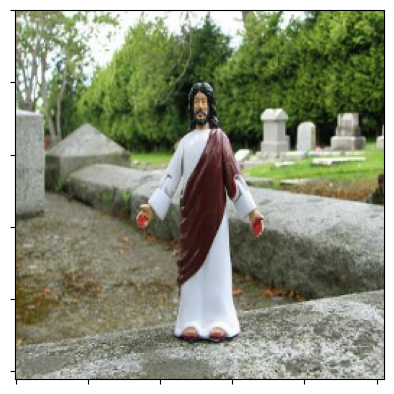

<生成>
懸賞生活しても捨てられる
<学習データ>
何も言えなくて～墓～
いえ、マシュマロにチョコがかかってるんじゃなくてチョコにホワイトクリームがかかってるの。
イエス！降臨なう！
右の頬を叩かれたら、左の頬を殴り返しなさい
心お下劣な物は幸いである。天はその人に一時の夢を与えるだろう。
まあ、なんてーの、偶像崇拝？みたいな。
「そこでね、私、なんかイヤ～な感じがしたんだな～」
「今日のファッション・ポイントは、丈長めのＴシャツに、干し肉色のストールを斜め掛けしました。ピーコさんお手柔らかに！」
懸賞生活してた人？
「あなたはお下劣ですか？と尋ねられたならば、答えはイエスです。」
「ねぇ俺って何歳に見える？結構若くみられるんだよね～。」
私の胸に飛び込んでおいで
捨てる神あれば捨てられる神あり


In [8]:
generate_boke(72182)